## Auotenecoder

 An autoencoder is a type of neural network used for unsupervised learning that learns to reconstruct its own input by compressing it into a lower-dimensional representation, called a latent space, and then expanding it back to the original input format. It consists of an encoder that performs the compression and a decoder that performs the reconstruction.

#### Flow of Autoencoder
Noisy Image -> Encoder -> Compressed Representation -> Decoder -> Reconstruct Clear Image

### Import Modules

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
from keras import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

### Load the Dataset

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()


In [8]:
#Normalize the image data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [9]:
#reshape in the input data for the model
x_train= x_train.reshape(len(x_train), 28, 28, 1)
x_test= x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

#### Add Noise to the Image

In [11]:
#Add Noise
noise_factor= 0.6
x_train_noisy= x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy =x_test + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=x_test.shape)

In [12]:
#clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

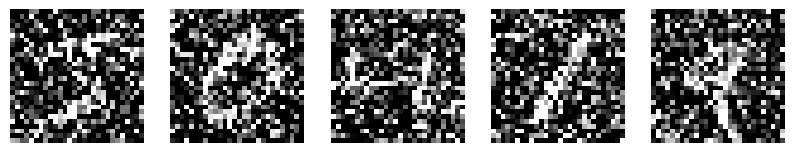

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


### Exploratory Data Analysis

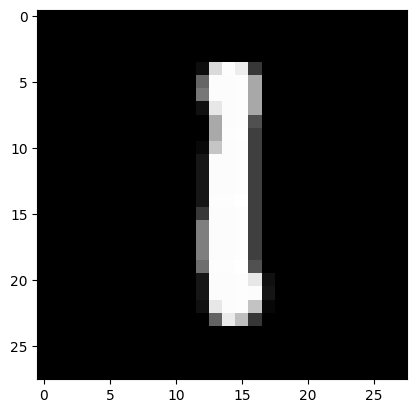

In [14]:
# randomly select input image
index = np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

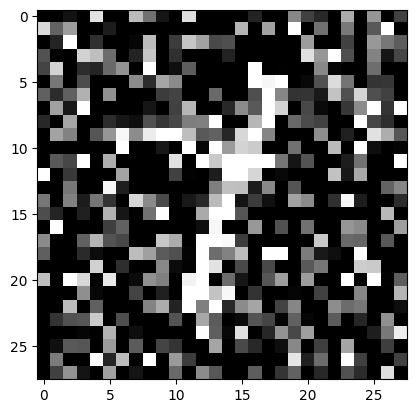

In [15]:
#randomly select input image
index = np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()

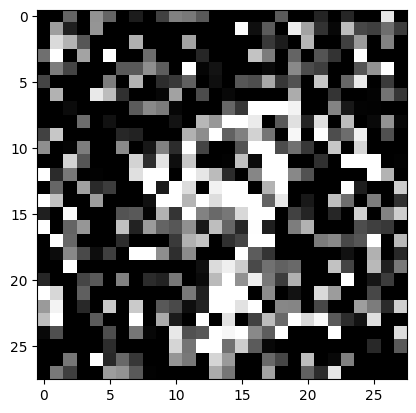

In [16]:
# randomly select input image
index = np.random.randint(len(x_test))
# plot the image 
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()

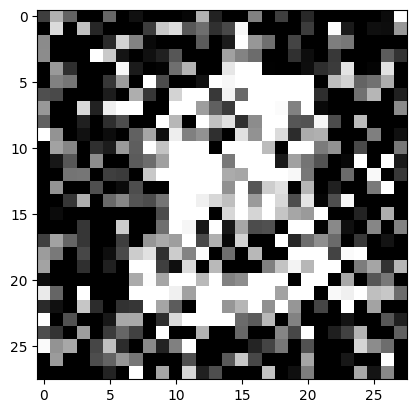

In [17]:
# randomly select input image
index = np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()

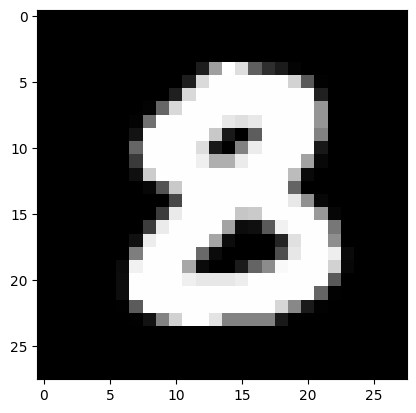

In [18]:
plt.imshow(x_test[index].reshape(28, 28))
plt.gray()

### Model Creation

In [20]:
model = Sequential( [
    #enocoder network
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    #decoder network
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    #ouput layer
    Conv2D(1, 3, activation='sigmoid', padding='same')
], name='Autoencoder')

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()




Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 16)     

In [21]:
# Train the Model
model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20

235/235 [==============================] - 31s 126ms/step - loss: 0.2280 - val_loss: 0.1438
Epoch 2/20
235/235 [==============================] - 27s 115ms/step - loss: 0.1381 - val_loss: 0.1317
Epoch 3/20
235/235 [==============================] - 27s 117ms/step - loss: 0.1305 - val_loss: 0.1265
Epoch 4/20
235/235 [==============================] - 27s 116ms/step - loss: 0.1259 - val_loss: 0.1224
Epoch 5/20
235/235 [==============================] - 27s 115ms/step - loss: 0.1225 - val_loss: 0.1204
Epoch 6/20
235/235 [==============================] - 28s 119ms/step - loss: 0.1201 - val_loss: 0.1177
Epoch 7/20
235/235 [==============================] - 27s 115ms/step - loss: 0.1183 - val_loss: 0.1171
Epoch 8/20
235/235 [==============================] - 27s 115ms/step - loss: 0.1170 - val_loss: 0.1152
Epoch 9/20
235/235 [==============================] - 27s 116ms/step - loss: 0.1160 - val_loss: 0.1144
Epoch 10/20
235/235 [==============================] - 29s 122ms/step - 

### Visualize the Results

In [23]:
#Predict the results from model (get compressed images)
pred = model.predict(x_test_noisy)


313/313 [==============================] - 4s 10ms/step


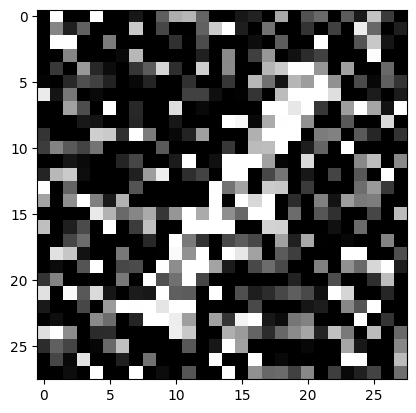

In [24]:
#randomly select input image
index = np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()

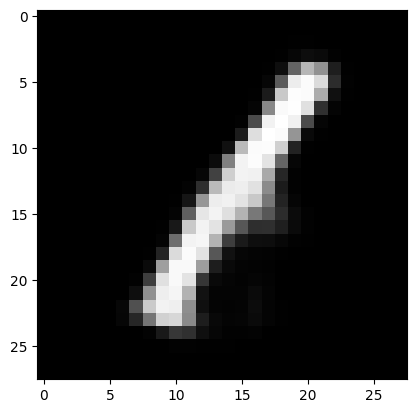

In [25]:
#Visualize compressed image
plt.imshow(pred[index].reshape(28, 28))
plt.gray()

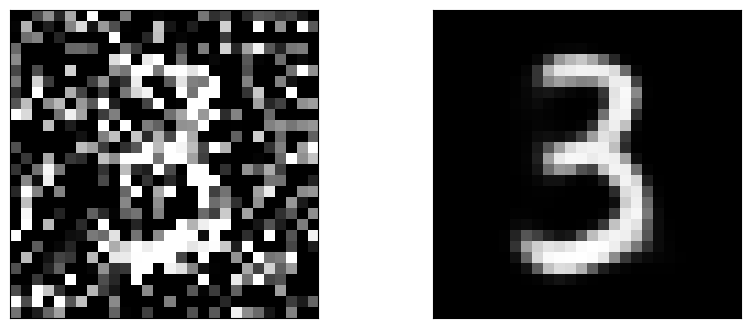

In [26]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
#display original image
ax= plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()

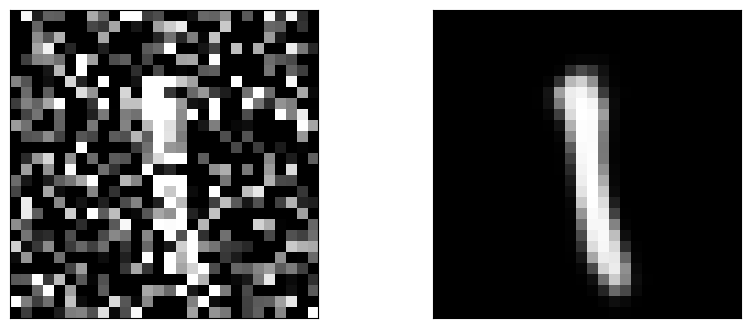

In [27]:
index=np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
#display original image
ax=plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#Display compressed image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()